<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SHAP-Values" data-toc-modified-id="SHAP-Values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SHAP Values</a></span></li><li><span><a href="#Excersise" data-toc-modified-id="Excersise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Excersise</a></span></li><li><span><a href="#Advanced-Uses" data-toc-modified-id="Advanced-Uses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Advanced Uses</a></span></li></ul></div>

# SHAP Values
https://www.kaggle.com/dansbecker/shap-values

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

SEED = 1


In [10]:
data = pd.read_csv('../data/FIFA 2018 Statistics.csv')
feats = data.select_dtypes(include=[np.int64]).columns
X = data[feats]
y = (data['Man of the Match']=='Yes')

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=SEED)
rfc = RandomForestClassifier(random_state=SEED).fit(X_train, y_train)

In [12]:
import shap 

row = 5
data_for_prediction = X_test.iloc[row]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(rfc)
shap_vals = explainer.shap_values(data_for_prediction)

In [14]:
shap_vals

[array([-0.09123387,  0.00992044, -0.04616935, -0.07546403, -0.01429477,
        -0.0097352 , -0.04122118, -0.01121595, -0.02354356, -0.00685229,
         0.00737317, -0.00928158,  0.07813991, -0.05867635, -0.00566205,
         0.        ,  0.        ,  0.        ]),
 array([ 0.09123387, -0.00992044,  0.04616935,  0.07546403,  0.01429477,
         0.0097352 ,  0.04122118,  0.01121595,  0.02354356,  0.00685229,
        -0.00737317,  0.00928158, -0.07813991,  0.05867635,  0.00566205,
         0.        ,  0.        ,  0.        ])]

In [15]:
rfc.predict_proba(data_for_prediction_array)

array([[0.2, 0.8]])

In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_vals[1], data_for_prediction)

In [18]:
k_explainer = shap.KernelExplainer(rfc.predict_proba, X_train)
k_shap_vals = k_explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_vals[1], data_for_prediction)

# Excersise
https://www.kaggle.com/dansbecker/exercise-shap-values

In [22]:
import pandas as pd
import sys
sys.path.append('../tools/ml-insights-tools')
from ex4 import *

data = pd.read_csv('../data/hospital-readmissions/train.csv')
data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [25]:
data.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  gender_Female  age_[70-80)  \
0            True                 False          False        False   
1            True                 False           True        False   
2            True                 False           True        False   
3            True                 False           True        False   
4            True                 False           True        False   

   age_[60-70)  age_[50-60)  age_[80-90)  age_[40-50)  payer_code_?  \
0        False         True        False        False         False   
1        False         True        False        False         False   
2        False        False         True        False         False   
3        False         True        False        False          True   
4        False        False         True        False          True   

   payer_code_MC  payer_code_HM  payer_code_SP  payer_code_BC  \
0          False          False           True          False   
1          False          False           True          False   
2           True          False          False          False   
3          False          False          False          False   
4          False          False          False          False   

   medical_specialty_?  medical_specialty_InternalMedicine  \
0                 True                               False   
1                 True                               False   
2                 True                               False   
3                 True                               False   
4                False                               False   

   medical_specialty_Emergency/Trauma  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   medical_specialty_Family/GeneralPractice  medical_specialty_Cardiology  \
0                                     False                         False   
1                                     False                         False   
2                                     False                         False   
3                                     False                         False   
4                                      True                         False   

   diag_1_428  diag_1_414  diag_1_786  diag_2_276  diag_2_428  diag_2_250  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False        True       False       False       False       False   
4       False       False       False       False       False       False   

   diag_2_427  diag_3_250  diag_3_401  diag_3_276  diag_3_428  \
0       False       False        True       False       False   
1       False       False       False       False       False   
2       False       False       False       False       False   
3       False       False 

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

SEED = 1

y = data.readmitted
base_feats = [ c for c in data.columns if c != 'readmitted']
X = data[base_feats]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)
rfc = RandomForestClassifier(n_estimators=30, random_state=SEED).fit(X_train, y_train)

In [40]:
# permutation plot
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rfc, random_state=SEED).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

In [35]:
q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# Use permutation importance as a succinct model summary
# A measure of model performance on validation data would be useful here too

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

```

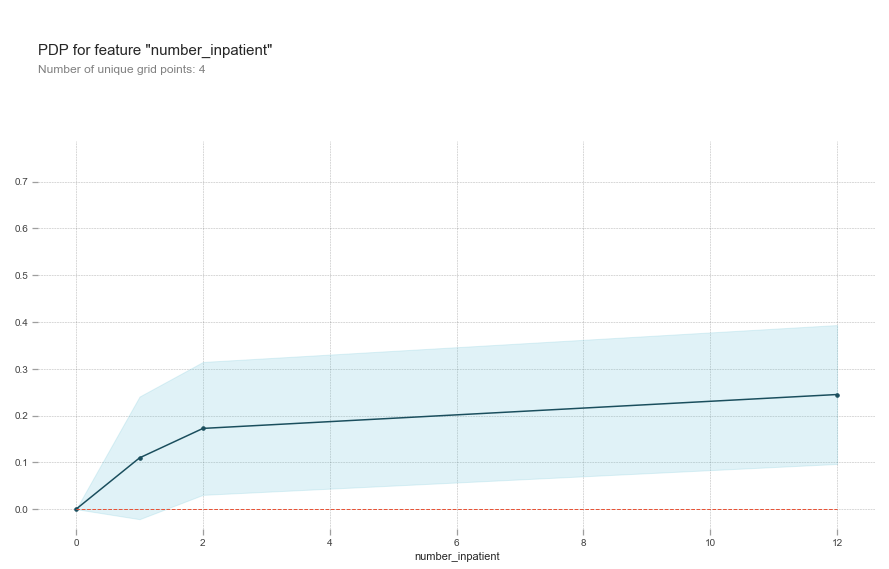

In [44]:
# pertial plot
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Change "Goal Scored" and plot
pdp_goals = pdp.pdp_isolate(
    model=rfc, dataset=X_test, model_features=X_test.columns, feature='number_inpatient')
pdp.pdp_plot(pdp_goals, 'number_inpatient')
plt.show()

In [43]:
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# PDP for number_inpatient feature

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_name = 'number_inpatient'
# Create the data that we will plot
my_pdp = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=val_X.columns, feature=feature_name)

# plot it
pdp.pdp_plot(my_pdp, feature_name)
plt.show()

```

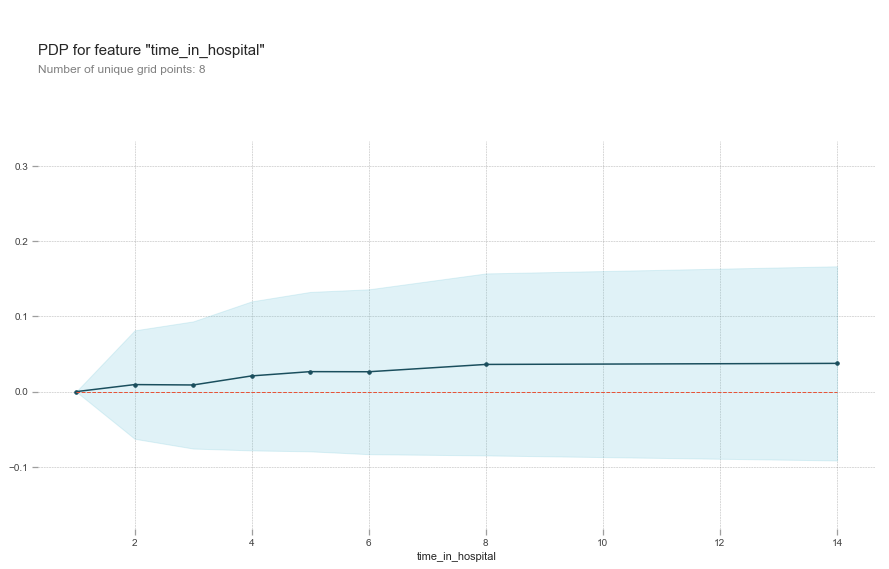

In [48]:
# pertial plot
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Change "Goal Scored" and plot
pdp_goals = pdp.pdp_isolate(
    model=rfc, dataset=X_test, model_features=X_test.columns, feature='time_in_hospital')
pdp.pdp_plot(pdp_goals, 'time_in_hospital')
plt.show()

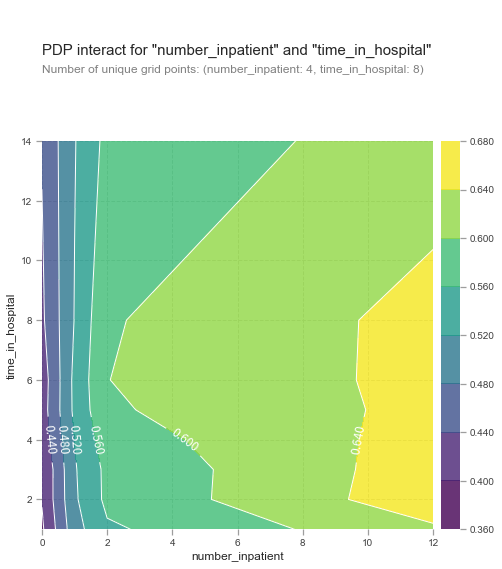

In [46]:
feature_to_plot = ['number_inpatient', 'time_in_hospital']
inter = pdp.pdp_interact(
    model=rfc, dataset=X_test, model_features=X_test.columns, features=feature_to_plot)

pdp.pdp_interact_plot(
    pdp_interact_out=inter, feature_names=feature_to_plot, plot_type='contour')
plt.show()

In [47]:
q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
The results are very different. Specifically time in hospital has a much smaller effect. Code below:

    from matplotlib import pyplot as plt
    from pdpbox import pdp, get_dataset, info_plots

    feature_name = 'time_in_hospital'
    # Create the data that we will plot
    my_pdp = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=val_X.columns, feature=feature_name)

    # plot it
    pdp.pdp_plot(my_pdp, feature_name)
    plt.show()


In [49]:
q_4.hint()
q_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> This requires a groupby (from pandas) on the raw data, rather than using a model

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# A simple pandas groupby showing the average readmission rate for each time_in_hospital.

# Do concat to keep validation data separate, rather than using all original data
all_train = pd.concat([train_X, train_y], axis=1)

all_train.groupby(['time_in_hospital']).mean().readmitted.plot()
plt.show()

```

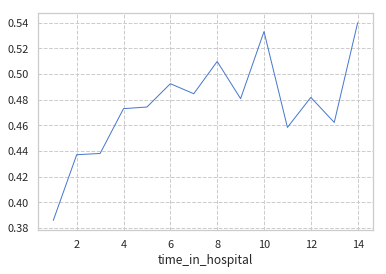

In [54]:
all_train = pd.concat([X_train, y_train], axis=1)
all_train.groupby(['time_in_hospital']).mean().readmitted.plot()
plt.show()

In [63]:
import shap
simple_data_for_prediction = X_test.iloc[0].astype(float)


def patient_risk_factors(model, patient_data, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient_data)
    shap.initjs()

    return shap.force_plot(
        explainer.expected_value[1],
        shap_values[1],
        patient_data,
        feature_names=feature_names)

patient_risk_factors(rfc, X_test.iloc[10].values.astype(int).reshape(1, -1), feature_names=X_test.columns)

In [55]:
q_5.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# Use SHAP values to show the effect of each feature of a given patient

import shap  # package used to calculate Shap values

sample_data_for_prediction = val_X.iloc[0].astype(float)  # to test function

def patient_risk_factors(model, patient_data):
    # Create object that can calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient_data)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient_data)


```

# Advanced Uses
https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values